## Deepankar Chakraborty
#### Assignment-2 
#### CSc 447- Machine Learning
#### Classifying Iris Dataset using Scholastic Gradient Descent(SGD)
<hr style="height:1px;border:none;color:blue;background-color:blue;"> 

### Let us first import all the required libraries

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
import decimal

### Reading the csv file, and rename column appropiately

In [215]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [216]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [218]:
df = df.rename(columns={0:"sepal length (cm)", 1:"sepal width (cm)", 2:"petal length (cm)", 3:"petal width(cm)", 4:"class"})

In [219]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [220]:
df.columns = df.columns.str.replace(' ', '_')

In [221]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Checking for any null values

In [222]:
df.isnull().sum()

sepal_length_(cm)    0
sepal_width_(cm)     0
petal_length_(cm)    0
petal_width(cm)      0
class                0
dtype: int64

### Drawing pair plots to visualize the relation between features

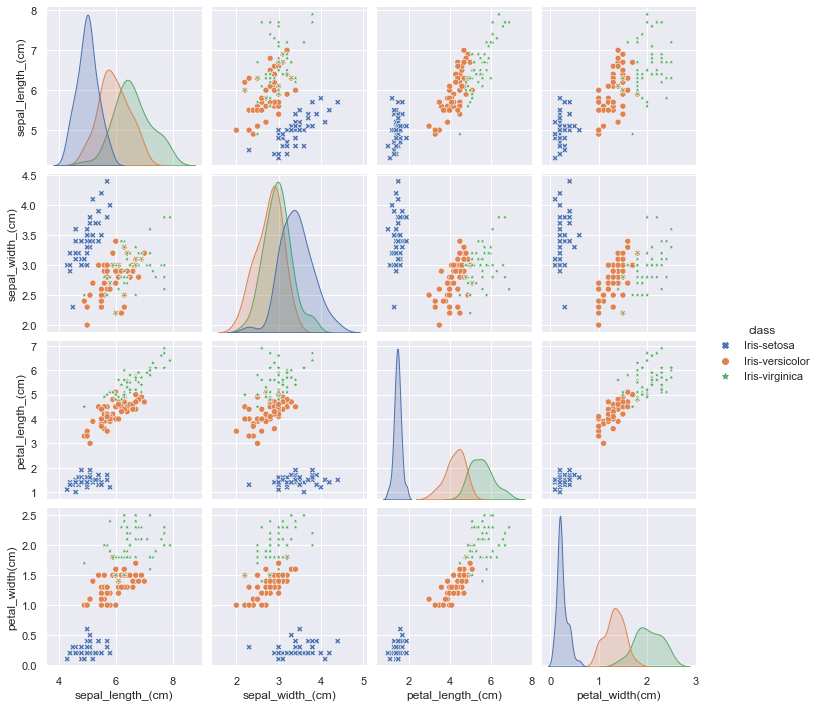

In [223]:
ax = sns.pairplot(data=df, hue='class', markers=['X','o','*'], kind='scatter')

In [154]:
features = df.columns[0:len(df.columns)-1]
for f in features:
    print(f)

sepal_length_(cm)
sepal_width_(cm)
petal_length_(cm)
petal_width(cm)


In [240]:
y = df["class"]
y 
#as we can see the classes are of string data type. To get a propoer result, we should turn them into numbers. 
#So that the loss function can calculate properly.  

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

### The y-labels are strings. We will need to turn them into numerical values for calculating the loss function in our model. LabelEncoder is a function that turnes string labels into numbers. 

In [241]:
# creating instance of labelencoder
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
df['class'] = labelencoder.fit_transform(df['class'])

df['class'] #Encoder turned 3 classes into either- 0,1,2. 

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32

#### Creating a dataframe where I can organize and save all 60 of my answers. 

In [324]:
df_60_trainInfo = pd.DataFrame(columns=["fetures_count", "features_name", "loss_func", "accuracy_score"])
print(df_60_trainInfo)

Empty DataFrame
Columns: [fetures_count, features_name, loss_func, accuracy_score]
Index: []


### To get all 15 possible combinations with the four features, we will use itertools.combinations function

In [325]:
#get combinations of all features
def getFeatureCombination(features):
    feature_combination = list()

    for num_features in range(1, len(features)+1):
        feature_combination+=(list(combinations(features, num_features)))
    return feature_combination

### Function applying 4 loss functions on each feature combinations 

In [326]:
loss_functions = ['hinge','log_loss', 'perceptron', 'modified_huber']
def selectLossFunction(X_train, y_train):
    for loss in loss_functions:
        trainModel(X_train,y_train, loss)

### Tranning Model given a loss function, and x_train, y_train variables 

In [327]:
def trainModel(X_train,y_train,loss_func):
    model = SGDClassifier(loss=loss_func, learning_rate='optimal', eta0=0.01, random_state=30)
    model.fit(X_train, y_train)
    
    col_info = list(X_train.columns)
    accuracy = round(model.score(X_train, y_train),2)
    
    #Saving data to the dataframe create in line 242.
    df_60_trainInfo.loc[len(df_60_trainInfo)] = [len(col_info), col_info, loss_func, accuracy]

### Selecting each feature combinations for tranning:

In [328]:
selected_features = []    #selecting specific features for tranning 
feature_combination = getFeatureCombination(features) #all 15 combinations of the features

for ith_comb_feat in range(len(feature_combination)):
    selected_features = list(feature_combination[ith_comb_feat])
    X_train = df[selected_features]
    y_train = df['class']
    selectLossFunction(X_train,y_train)

In [364]:
# Checking the shape of our df to confirm  60 rows.
df_60_trainInfo.shape

(60, 4)

In [373]:
# Showing a small sample of the full database.
df_60_trainInfo.loc[10:20]

,fetures_count,features_name,loss_func,accuracy_score
10,1,[petal_length_(cm)],perceptron,0.87
11,1,[petal_length_(cm)],modified_huber,0.95
12,1,[petal_width(cm)],hinge,0.83
13,1,[petal_width(cm)],log_loss,0.95
14,1,[petal_width(cm)],perceptron,0.67
15,1,[petal_width(cm)],modified_huber,0.89
16,2,"[sepal_length_(cm), sepal_width_(cm)]",hinge,0.66
17,2,"[sepal_length_(cm), sepal_width_(cm)]",log_loss,0.65
18,2,"[sepal_length_(cm), sepal_width_(cm)]",perceptron,0.66
19,2,"[sepal_length_(cm), sepal_width_(cm)]",modified_huber,0.67


### Max Accuracy
<p>The max accuracy score among all 60 models is <strong>96%</strong>. It is achieved when 3 of the features: sepal_width, petal_length, petal_width are combined with los_loss as the loss function.</p>

In [362]:
max_acc_num = df_60_trainInfo['accuracy_score'] == df_60_trainInfo['accuracy_score'].max()
max_accuracy_index = df_60_trainInfo.index[max_acc_num]

df_60_trainInfo.loc[[max_accuracy_index[0]]]

,fetures_count,features_name,loss_func,accuracy_score
53,3,"[sepal_width_(cm), petal_length_(cm), petal_wi...",log_loss,0.96


### Min Accuracy

<p>The least accurate model is when only 1 feature: sepal width is used in the model. The accuracy score for this model is only <strong>43%</strong>, which is fair to say that probabilistically we might get better result just by fliping a coin.</p>


In [363]:
min_acc_num = df_60_trainInfo['accuracy_score'] == df_60_trainInfo['accuracy_score'].min()
min_accuracy_index = df_60_trainInfo.index[min_acc_num]

df_60_trainInfo.loc[[min_accuracy_index[0]]]

,fetures_count,features_name,loss_func,accuracy_score
5,1,[sepal_width_(cm)],log_loss,0.43


### Plot

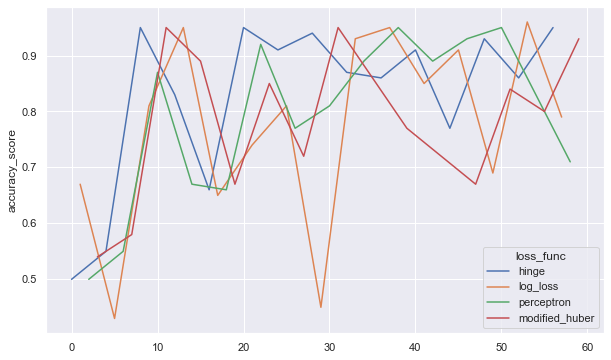

In [360]:
ax = sns.lineplot(data=df_60_trainInfo,x=df_60_trainInfo.index, y='accuracy_score', hue='loss_func')
sns.set(rc={'figure.figsize':(10,6)})

## Visuzlize Dataframe

In [348]:
gb_cols = ['fetures_count', 'loss_func']
gbo = df_60_trainInfo.groupby(gb_cols) #gbo = group by object

print(round(gbo['accuracy_score'].mean(),2))

fetures_count  loss_func     
1              hinge             0.71
               log_loss          0.72
               modified_huber    0.74
               perceptron        0.65
2              hinge             0.86
               log_loss          0.76
               modified_huber    0.80
               perceptron        0.83
3              hinge             0.87
               log_loss          0.85
               modified_huber    0.76
               perceptron        0.90
4              hinge             0.95
               log_loss          0.79
               modified_huber    0.93
               perceptron        0.71
Name: accuracy_score, dtype: float64


#### Initial Thoughts

<p style="text-indent: 50px;"> 
    In the above table, I've used pandas Group By function to group my results. I've applied double group by objects to show the relationship between feature counts, loss function, and their mean accuracies. From the above table, it can be seen that on average accuracy of the model has increased with the number of features used in for tranning. Means, the more features we have, the better result we get.
    <p>
    <p style="text-indent: 50px;">
        When we used only 1 feature, our accuracy score was around 60s, and 70s across all 4 loss function. For 2 features, the accuracy score increaed to 70s and 80s. And finnaly, for 4 features, accuracy scores are mostly at 80s, and 90s, with the exception of perceptron that has 71%.
    </p>
        <p style="text-indent: 50px;">
        Based on these observation, we can say that with more features, our model predicts wit high varience, with less accurate results. However, we need to be aware of the burden of overfitting the model for the given dataset if we use more features. 
    </p>

#### Pairing with Loss functions:

The four loss functions that I used for this project are: <strong><em>hinge loss, log loss, perceptron, and modified huber.</em></strong> 
<br><strong>Hinge Loss</strong><img src='https://miro.medium.com/max/400/1*KFN3B8jLPGEjVh5gYuSgDA.png'>

<br><strong>Log loss:</strong><img src="https://images.ctfassets.net/pzhspng2mvip/3XoximAqGDkrh3uLpsQqPq/05f181d9afab7c9ef484e2deee695a7b/Binary_Cross-Entropy___Log_Loss.png">

<p style="text-indent: 50px;">
    For this exercise, we are using SGD Classifier, which is s a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Adopted from:<a href="https://scikit-learn.org/stable/modules/sgd.html#:~:text=Stochastic%20Gradient%20Descent%20(SGD)%20is,Vector%20Machines%20and%20Logistic%20Regression.">Scikit-Learn.</a> SGDClassifier supports multi-class classification through "one versus all" scheme, by combining multiple binary claffifiers. 
    </p> 
    <p style="text-indent: 50px;">
    Although for most logistic regression, log loss function gives the most optimal answer, in this exercise, the hinge loss produced the most accurate model on average. From the SGD documentation we've seen that using hinge loss is quivelent to using Support Vector Machines for optimization. So it's fair to say that hinge loss punishes misclassificatoins, thus leading to a better accuracy, with a risk/cost of lower probability of estimation.
</p>

<p style="text-indent: 50px;">
    Additionally, we can see modified Huber Function also produced models with fairly high accuracy number. This is becasue, according to the <a href="https://scikit-learn.org/stable/modules/sgd.html#:~:text=Stochastic%20Gradient%20Descent%20(SGD)%20is,Vector%20Machines%20and%20Logistic%20Regression."> Scikit Learn Documentaion:</a> Modified Huber loss is a smoothed hinge loss function, that often provides better optimization. 
    </p>

In [245]:
#===============================================================================================================================